In [1]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

In [2]:
def plt_imshow(image):
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.show()

class DrawManager:
    def __init__(self, shape):
        self.ix, self.iy = -1, -1
        self.x, self.y = -1, -1
        self.mask = np.ones(shape)
        self.drawing = False
        
    def draw_rectangle(self, event, x, y, flags, param):
        self.x, self.y = x, y
        if event == cv2.EVENT_LBUTTONDOWN:
            self.drawing = True
            self.ix, self.iy = x, y
        
        elif event == cv2.EVENT_MOUSEMOVE:            
            if self.drawing == True:
                start_x, end_x = (self.ix, x) if self.ix < x else (x, self.ix)
                start_y, end_y = (self.iy, y) if self.iy < y else (y, self.iy)
                
                self.mask[:] = np.ones(self.mask.shape)
                self.mask[start_y:end_y, start_x:end_x] = np.zeros((end_y-start_y, end_x-start_x))

        elif event == cv2.EVENT_LBUTTONUP:
            self.drawing = False
            

In [3]:
orig_img = cv2.imread('download.png') / 255.0
img = np.copy(orig_img)
dm = DrawManager(img.shape[:-1])

cv2.namedWindow('image')
cv2.createTrackbar('Mode', 'image', 0, 3, lambda x: None)
cv2.setMouseCallback('image', dm.draw_rectangle)

while True:
    cv2.imshow('image', img)
    
    if cv2.waitKey(2) & 0xFF == 27:
        break
    
    mode = cv2.getTrackbarPos('Mode','image')
    
    b, g, r = cv2.split(orig_img)
    
    mask = dm.mask
    
    if mode == 0:
        new_img = cv2.merge((b * mask, g * mask, r))
    elif mode == 1:
        new_img = cv2.merge((b * mask, g, r * mask))
    elif mode == 2:
        new_img = cv2.merge((b, g * mask, r * mask))
    else:
        new_img = orig_img
        
    cv2.putText(new_img, f'Mouse Position {dm.x, dm.y}',(10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (1, 1, 1), 2, cv2.LINE_AA)
    
    img = new_img 
        
cv2.destroyAllWindows()

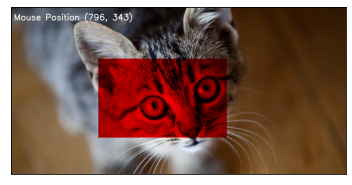

In [4]:
def convert_gbr2rgb(x):
    b, g, r = cv2.split(img)
    return cv2.merge((r, g, b))


plt_imshow(convert_gbr2rgb(img))